# Практична робота №1
**Тема:** Множинна лінійна регресія методом градієнтного спуску

**Мета:** Реалізувати алгоритм з нуля та перевірити 6 класичних припущень МНК.

---

## 1. Імпорт необхідних бібліотек

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats


## 2. Завантаження та первинний аналіз даних

Перші рядки таблиці:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0



Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

Описова статистика:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000



Перевірка пропусків:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


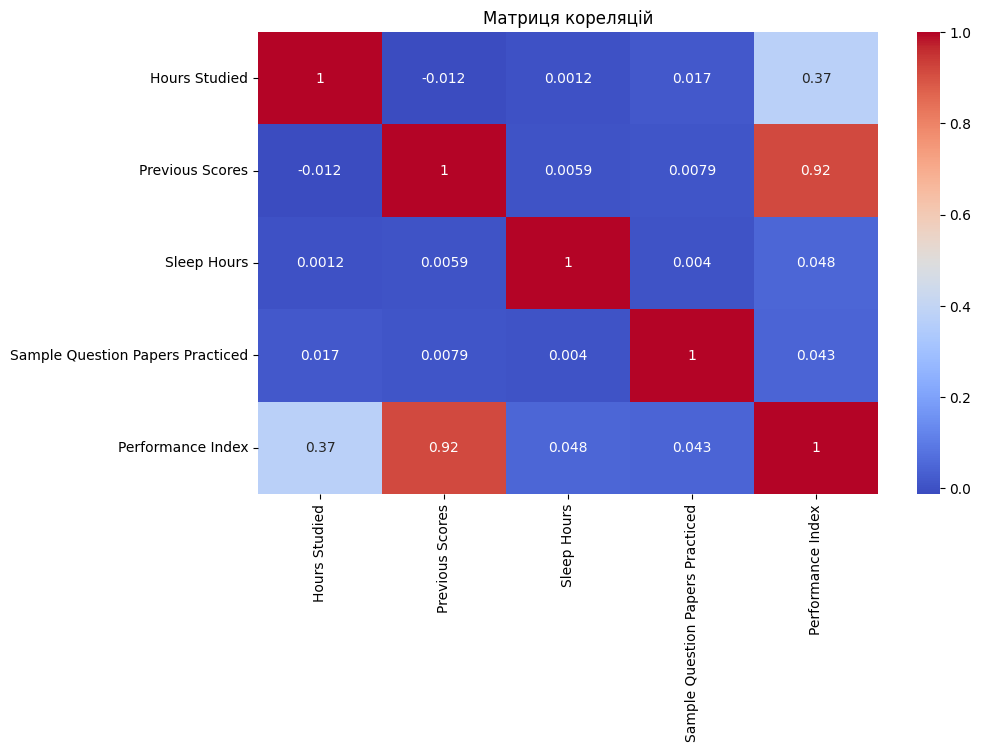

In [2]:

df = pd.read_csv("Student_Performance.csv")

print("Перші рядки таблиці:")
display(df.head())

print("\nІнформація про датасет:")
print(df.info())

print("\nОписова статистика:")
display(df.describe())

print("\nПеревірка пропусків:")
print(df.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Матриця кореляцій")
plt.show()


## 3. Попередня обробка даних

In [3]:

# Кодуємо категоріальні змінні
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"No":0,"Yes":1})

# Виділяємо ознаки та ціль
y = df["Performance Index"].values
X = df.drop(columns=["Performance Index"]).values

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Додаємо стовпець одиниць для β0
X_train_final = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_final = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


## 4. Реалізація градієнтного спуску

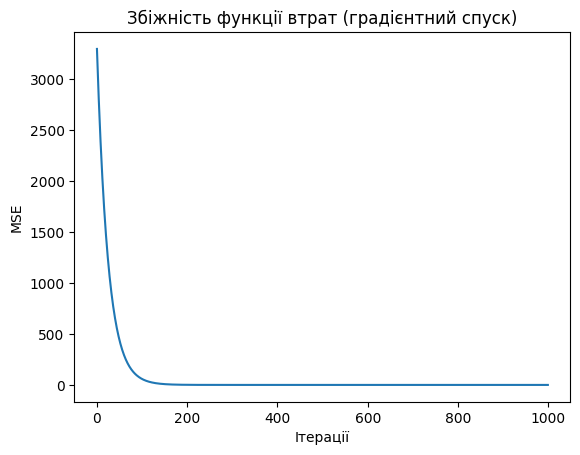

In [ ]:

def compute_cost(X, y, b):
    predictions = X.dot(b)
    errors = predictions - y
    return (1/len(y)) * np.sum(errors**2)

def gradient_descent(X, y, b, learning_rate, epochs):
    cost_history = []
    m = len(y)
    for _ in range(epochs):
        predictions = X.dot(b)  # Обчислення передбачень
        errors = predictions - y  # Обчислення помилки
        gradient = (2/m) * X.T.dot(errors) # Обчислення градієнта (похідна MSE за b)
        b -= learning_rate * gradient  # Оновлення ваг
        cost_history.append(compute_cost(X, y, b)) # Збереження поточного MSE для історії
    return b, cost_history

# Ініціалізація
b = np.zeros(X_train_final.shape[1])
learning_rate = 0.01
epochs = 1000

# Навчання
b_final, cost_history = gradient_descent(X_train_final, y_train, b, learning_rate, epochs)

# Візуалізація збіжності
plt.plot(cost_history)
plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.title("Збіжність функції втрат (градієнтний спуск)")
plt.show()


## 5. Оцінка якості моделі

In [5]:

y_pred = X_test_final.dot(b_final)
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Середньоквадратична помилка (MSE) на тестових даних:", mse_test)
print("✅ Коефіцієнт детермінації (R²):", r2)
print("✅ Остаточні коефіцієнти моделі (b_final):")
print(b_final)


✅ Середньоквадратична помилка (MSE) на тестових даних: 4.08262839176648
✅ Коефіцієнт детермінації (R²): 0.9889832909755435
✅ Остаточні коефіцієнти моделі (b_final):
[55.31149991  7.40134077 17.63727123  0.30429076  0.81003107  0.54884172]


## 6. Перевірка припущень МНК

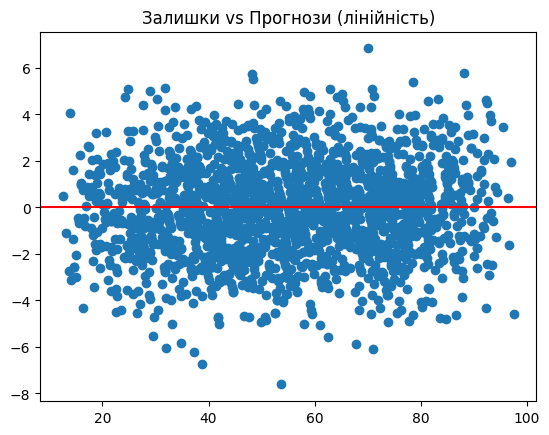


Перевірка мультиколінеарності (VIF):
                             Ознака       VIF
0                     Hours Studied  1.000387
1                   Previous Scores  1.000243
2        Extracurricular Activities  1.000428
3                       Sleep Hours  1.000461
4  Sample Question Papers Practiced  1.000320


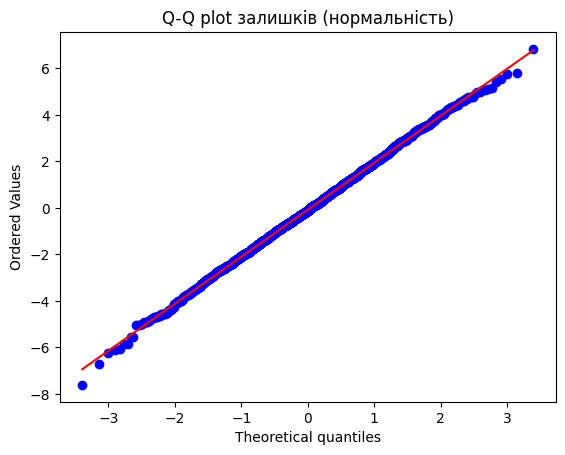

Результати тесту Шапіро-Уїлка для нормальності залишків: ShapiroResult(statistic=0.9996101861121244, pvalue=0.9751496629511163)


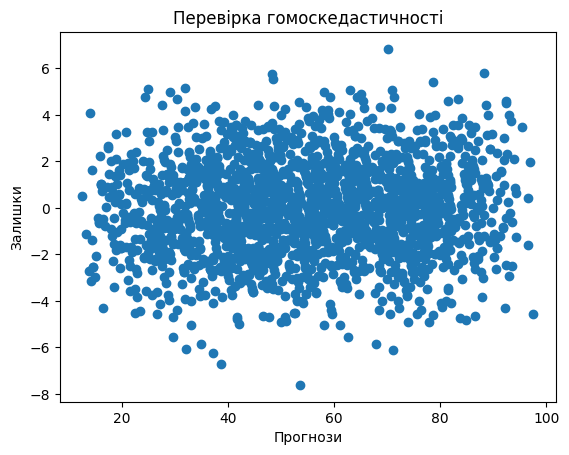

Коефіцієнт Дарбіна-Вотсона для автокореляції: 2.0471910474947848


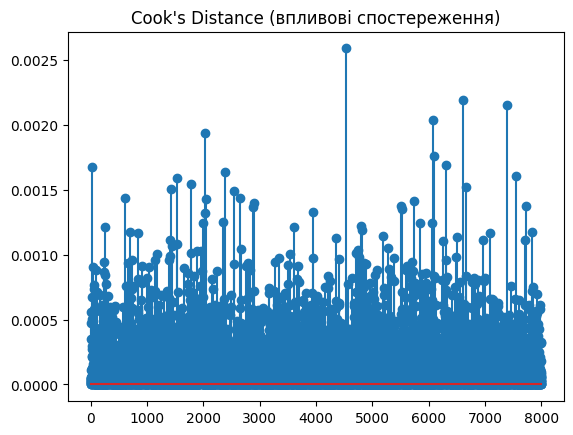

In [6]:

residuals = y_test - y_pred

# 1. Лінійність
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r')
plt.title("Залишки vs Прогнози (лінійність)")
plt.show()

# 2. VIF
X_vif = pd.DataFrame(X_train_scaled, columns=df.drop(columns=["Performance Index"]).columns)
vif_data = pd.DataFrame()
vif_data["Ознака"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nПеревірка мультиколінеарності (VIF):")
print(vif_data)

# 3. Нормальність залишків
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot залишків (нормальність)")
plt.show()
print("Результати тесту Шапіро-Уїлка для нормальності залишків:", stats.shapiro(residuals))

# 4. Гомоскедастичність
plt.scatter(y_pred, residuals)
plt.xlabel("Прогнози")
plt.ylabel("Залишки")
plt.title("Перевірка гомоскедастичності")
plt.show()

# 5. Автокореляція
from statsmodels.stats.stattools import durbin_watson
print("Коефіцієнт Дарбіна-Вотсона для автокореляції:", durbin_watson(residuals))

# 6. Cook’s distance
import statsmodels.api as sm
model_sm = sm.OLS(y_train, X_train_final).fit()
influence = model_sm.get_influence()
cooks = influence.cooks_distance[0]
plt.stem(cooks)
plt.title("Cook's Distance (впливові спостереження)")
plt.show()
